In [0]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
#Read the unlabelled Tweet set
df = pd.read_csv("TweetSentiments.csv")

In [4]:
df.head()

,Id,Category,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [0]:
df['Category'] = df['Category'].map(lambda x: x.lstrip('|'))

In [6]:
df.head()

,Id,Category,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [7]:
#Create the tokens in a seperate column in the dataframe
df['words'] = df.Tweet.str.strip().str.split('[\W_]+')
df.head()

,Id,Category,Tweet,words
0,635769805279248384,negative,Not Available,"[Not, Available]"
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,"[IOS, 9, App, Transport, Security, Mm, need, t..."
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...","[Mar, if, you, have, an, iOS, device, you, sho..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,"[, jimmie, vanagon, my, phone, does, not, run,..."
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,"[Not, sure, how, to, start, your, publication,..."


(-0.5, 1199.5, 999.5, -0.5)

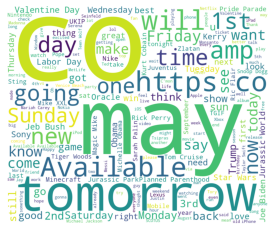

In [8]:
#Visualize the world cloud
#Concatenate all the words in data to form a string
str_data = " "
data_dump = df['Tweet']
for record in data_dump:
    str_data = str_data + " " + record

wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(str_data)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [9]:
#Explore the results
df.groupby('Category')['Category'].count()

Category
Tweet          1
negative     956
neutral     2123
positive    2888
Name: Category, dtype: int64

In [10]:
#Create Bag of Words (BoW) using CountVectoriser
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(df["Tweet"])
np.shape(X)

(5968, 14886)

In [33]:
#Transform the class_label to 1-0 (recode)
y=df["Category"].map({'positive':1,'negative':2, 'neutral':3})
y= np.nan_to_num(y)
#Create train and test samples
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3998, 14886), (1970, 14886)]


In [34]:
y[0:10]

array([2., 3., 3., 2., 1., 3., 3., 3., 3., 3.])

In [35]:
#Build a naive Bayesian model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)
print(prediction)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

[3. 1. 1. ... 3. 2. 1.]


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.5426395939086295

In [41]:
dfr = pd.DataFrame(y_test)
dfr['Prediction'] = prediction
dfr.columns=("Category","prediction")
dfr.head(3)

,Category,prediction
0,3.0,3.0
1,1.0,1.0
2,3.0,1.0


In [0]:
tp =  dfr[(dfr.Category	 == 1) & (dfr.prediction == 1)].count() +\
      dfr[(dfr.Category	 == 2) & (dfr.prediction == 2)].count() +\
      dfr[(dfr.Category	== 3) & (dfr.prediction == 3)].count()

In [45]:
tp

Category      1069
prediction    1069
dtype: int64

In [0]:
fp = dfr[(dfr.Category == 1) & (dfr.prediction == 2)].count() + \
     dfr[(dfr.Category == 1) & (dfr.prediction == 3)].count() +\
     dfr[(dfr.Category == 2) & (dfr.prediction == 1)].count() +\
     dfr[(dfr.Category == 2) & (dfr.prediction == 3)].count()  +\
     dfr[(dfr.Category == 3) & (dfr.prediction == 1)].count()  +\
     dfr[(dfr.Category == 3) & (dfr.prediction == 2)].count()

In [49]:
fp

Category      900
prediction    900
dtype: int64

In [50]:
!jupyter nbconvert MODULE4_DAY4_ModelBasedSentimentAnalysis.ipynb

[NbConvertApp] Converting notebook MODULE4_DAY4_ModelBasedSentimentAnalysis.ipynb to html
[NbConvertApp] Writing 437244 bytes to MODULE4_DAY4_ModelBasedSentimentAnalysis.html
